<h1>Basic Operations on Images</h1>

In [1]:
import cv2
import numpy as np

img = cv2.imread('images/messi.jpg')

In [2]:
img[100,100]

array([ 94,  99, 102], dtype=uint8)

In [3]:
img[100,100,0]

94

In [4]:
img.item(10,10,2)

26

In [5]:
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [6]:
img.shape

(231, 308, 3)

In [7]:
img.size #total number of pixels

213444

In [8]:
img.dtype

dtype('uint8')

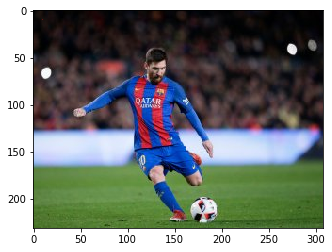

In [11]:
import matplotlib.pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

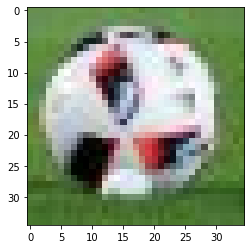

In [17]:
ball = img[195:230, 165:200]
plt.imshow(ball)

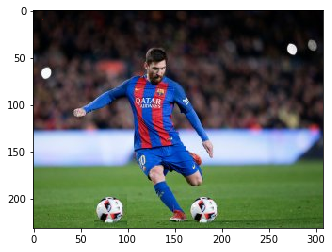

In [18]:
img[195:230, 65:100] = ball
plt.imshow(img)

In [21]:
r,g,b = cv2.split(img)

In [22]:
img = cv2.merge((b,g,r))

In [23]:
b = img[:,:,0]

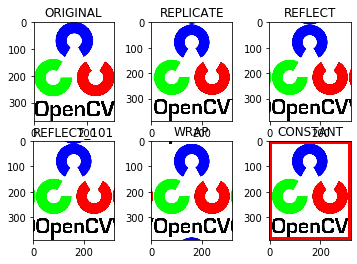

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('images/opencv-logo.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

<h1>Arithmetic Operations on Images</h1>

In [5]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) # 260 => 255

[[255]]


In [6]:
print(x+y) # Numpy addition and cv2 addition are different. 260%256 = 4

[4]


In [17]:
img1 = cv2.imread('images/messi.jpg')
img2 = cv2.flip(img1, 1)

dst = cv2.addWeighted(img1,0.65,img2,0.35,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
img1 = cv2.imread('images/messi5.jpg')
img2 = cv2.imread('images/opencv_logo_sqr.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

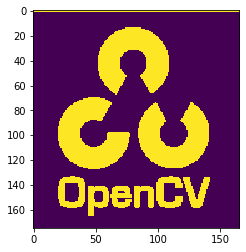

In [45]:
plt.imshow(mask)

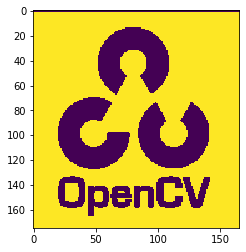

In [46]:
plt.imshow(mask_inv)

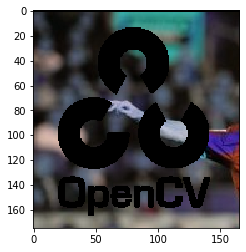

In [47]:
plt.imshow(img1_bg)

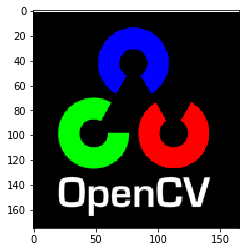

In [48]:
plt.imshow(img2_fg)

<h1>Performance Measurement and Improvement Techniques</h1>

In [49]:
e1 = cv2.getTickCount()
img = cv2.imread('images/messi.jpg')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()

In [50]:
time

0.0078588

In [53]:
img1 = cv2.imread('images/messi.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print(t)

0.3188835


In [54]:
cv2.useOptimized()

True

In [55]:
cv2.setUseOptimized(False)

In [56]:
cv2.useOptimized()

False

In [57]:
x = 5

In [58]:
%timeit y=x**2

793 ns ± 55.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
